In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

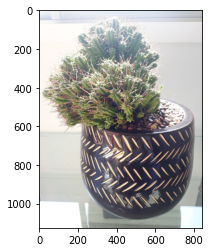

In [ ]:
img_2 = Image.open('/content/drive/MyDrive/Modelo C y S/Test/0/10.jpg')
plt.imshow(img_2)

In [ ]:
CLASSES = ['0', '1']

In [ ]:
test_data_dir = '/content/drive/MyDrive/Modelo C y S/Test'

In [ ]:
test_generator = ImageDataGenerator().flow_from_directory(test_data_dir
                                                           , target_size=(224, 224)
                                                           , batch_size=26
                                                           , classes=CLASSES
                                                           , seed=0
                                                           , shuffle=False)

Found 12 images belonging to 2 classes.


In [ ]:
model = load_model("/content/drive/MyDrive/Modelo C y S/Model.pt")

Index image [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


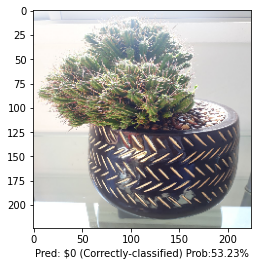

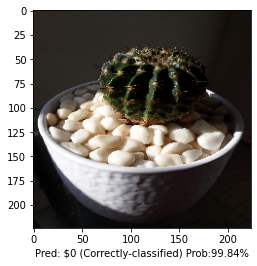

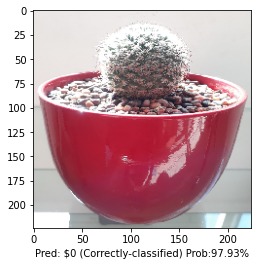

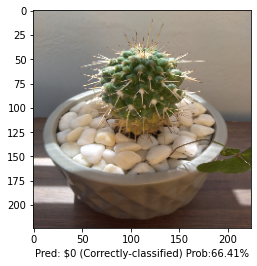

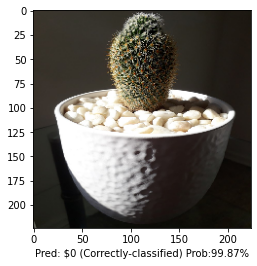

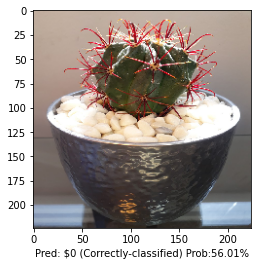

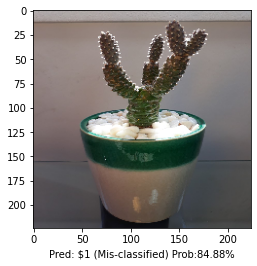

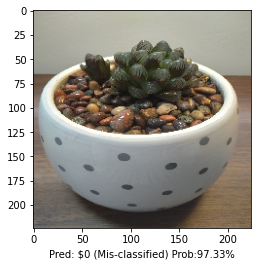

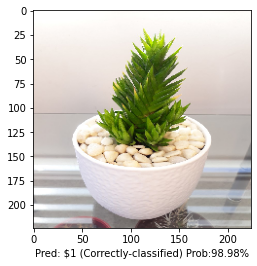

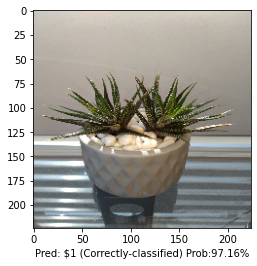

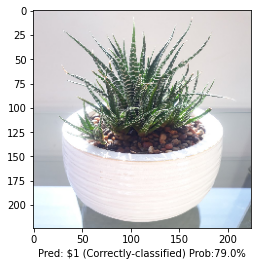

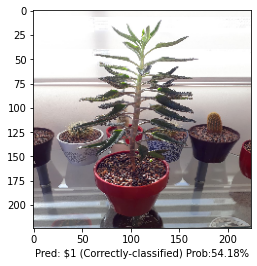

In [ ]:
#random.seed(1)
#numbers = [random.randint(0, 25) for i in range(0, 12)]
numbers = list(range(0, 12))
print('Index image', numbers)
predict = model.predict_generator(test_generator, steps=len(test_generator))
predict_prob = list(np.expand_dims(predict, axis=0))
predict = list(np.argmax(predict, axis=1))
label_map = (test_generator.class_indices)
label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
predict = [label_map[k] for k in predict]

filenames = test_generator.filenames
classes = test_generator.class_indices


for i in numbers:
    x = int(filenames[i].split('/')[0])-int(predict[i])
    x = np.where(x == 0, '(Correctly-classified)', '(Mis-classified)')
    plt.imshow(test_generator.next()[0][i].astype(np.uint8))
    plt.xlabel('Pred: '+predict[i]+' '+str(x)+ ' Prob:'+str(round((max(predict_prob[0][i])*100), 2)) +'%')
    plt.show()